In [8]:
# Imports for JupyterLite
%pip install -q ipywidgets matplotlib numpy scipy

In [9]:
%matplotlib inline

In [10]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [86]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import matplotlib
import numpy as np

In [87]:
def vector_to_rgb(angle, absolute):
    """Get the rgb value for the given `angle` and the `absolute` value

    Parameters
    ----------
    angle : float
        The angle in radians
    absolute : float
        The absolute value of the gradient
    
    Returns
    -------
    array_like
        The rgb value as a tuple with values [0..1]
    """
    global max_abs

    # normalize angle
    angle = angle % (2 * np.pi)
    if angle < 0:
        angle += 2 * np.pi

    return matplotlib.colors.hsv_to_rgb((angle / 2 / np.pi, 
                                         absolute / max_abs, 
                                         absolute / max_abs))

In [88]:
def source_sink(strength: float = 1.0):
    
    # Create a polar plot
    fig, ax = plt.subplots(subplot_kw={"projection": "polar"})
    
    theta_vec = np.linspace(0, 2*np.pi, 12)[:-1]
    r_vec = np.linspace(0, 5, 11)[4:]
    theta_mat, r_mat = np.meshgrid(theta_vec, r_vec)
    Vr = strength / (2 * np.pi * r_mat)
    Vt = np.zeros(theta_mat.shape)
    U = Vr * np.cos(theta_mat) - r_mat * Vt * np.sin(theta_mat)
    V = Vr * np.sin(theta_mat) + r_mat * Vt * np.cos(theta_mat)
    angles = np.arctan2(V, U)
    lengths = np.sqrt(np.square(U) + np.square(V))

    max_abs = np.max(lengths)
    # c = np.array(list(map(vector_to_rgb, angles.flatten(), lengths.flatten())))
    
    dr = 0.1
    dt = 0.1
    
    ax.quiver(theta_mat, r_mat, U, V)
    
    fig.suptitle("Source/Strength Velocity Field")
    
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='strength', max=5.0, min=-5.0), Output()), _dom_class…

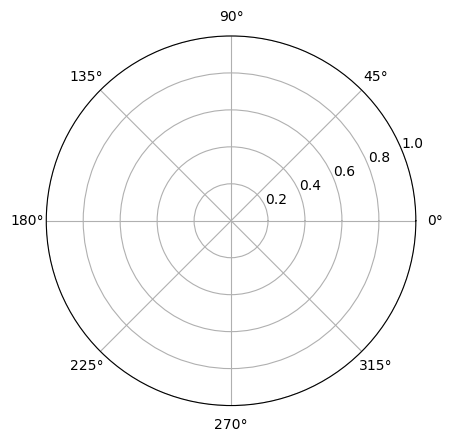

<class 'NameError'>: name 'max_abs' is not defined

In [89]:
w = interactive(source_sink, strength=(-5.0, 5.0))
display(w)